### 2 Years of Top 200 Trending Videos Analysis

##### Some of the questions to be answered

1. How long does it take for the video to get trending 

2. How is this duration changes across the two years 

3. Channels having multiple trending videos and how many times 

4. Analysis around likes, views, comments, etc. 

In [117]:
# importing necesary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv("Videos4.csv")
df.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...


In [68]:
df.shape

(40724, 16)

In [73]:
df.describe()

,category_id,views,likes,dislikes,comment_count,days_to_trend
count,40724.000000,4.072400e+04,4.072400e+04,4.072400e+04,4.072400e+04,40724.000000
mean,20.123809,4.199219e+05,1.738886e+04,8.149624e+02,1.832453e+03,2.800953
std,6.984422,1.772130e+06,8.720509e+04,1.139219e+04,1.404321e+04,45.952652
min,1.000000,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,17.000000,1.697450e+04,3.380000e+02,1.800000e+01,5.600000e+01,1.000000
50%,23.000000,7.372100e+04,1.892500e+03,8.300000e+01,2.350000e+02,1.000000
75%,24.000000,2.708088e+05,7.969500e+03,3.350000e+02,8.410000e+02,2.000000
max,44.000000,1.009116e+08,4.750254e+06,1.353661e+06,1.040912e+06,3190.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40724 entries, 0 to 40723
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40724 non-null  object
 1   trending_date           40724 non-null  object
 2   title                   40724 non-null  object
 3   channel_title           40724 non-null  object
 4   category_id             40724 non-null  int64 
 5   publish_time            40724 non-null  object
 6   tags                    40724 non-null  object
 7   views                   40724 non-null  int64 
 8   likes                   40724 non-null  int64 
 9   dislikes                40724 non-null  int64 
 10  comment_count           40724 non-null  int64 
 11  thumbnail_link          40724 non-null  object
 12  comments_disabled       40724 non-null  bool  
 13  ratings_disabled        40724 non-null  bool  
 14  video_error_or_removed  40724 non-null  bool  
 15  de

#### Distinct count of video count

In [7]:
df['video_id'].nunique()

30581

#### Distinct count of channel_title

In [8]:
df['channel_title'].nunique()

6680

In [70]:
# Convert the date column to datetime format

df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['publish_date'] = pd.to_datetime(df['publish_time']).dt.date.astype('datetime64')

# calculate the difference between trending date and publish date
df['days_to_trend'] = (df['trending_date'] - df['publish_date']).dt.days

In [75]:
# checking datatype of 'trending_date' and 'publish_date'
df[['trending_date','publish_date']].dtypes

trending_date    datetime64[ns]
publish_date     datetime64[ns]
dtype: object

In [72]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,days_to_trend
0,Ro6eob0LrCY,2017-11-14,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor""|""Dissident""|""Expliquez""|""moi""|""cette""|...",212702,29282,1108,3817,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,2017-11-13,1


In [98]:
def plot_hist(df_name):
    
    
    ax = df_name['days_to_trend'].plot.hist(bins=range(0, 14), alpha=0.5)
    
    # set the title and axis labels
    plt.title('Number of days to trend a video')
    plt.xlabel('Number of days')
    plt.ylabel('Number of Videos')
    for i in ax.patches:
        plt.text(i.get_x() + i.get_width()/2, i.get_y() + i.get_height()*1.02, str(int(i.get_height())), ha='center', va='center')

    # show the plot
    plt.show()

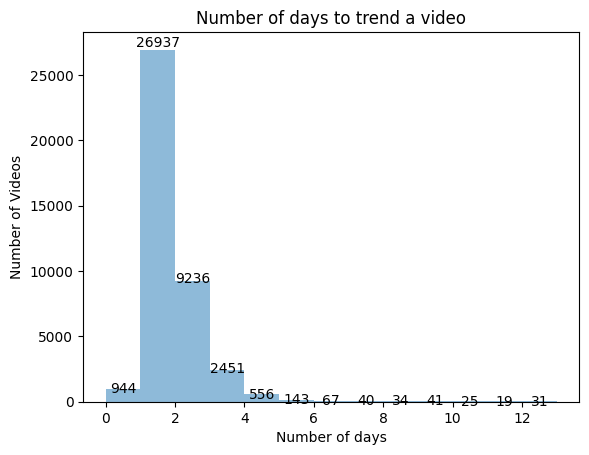

In [99]:
plot_hist(df_name = df)

#### Top 10 Channels have multiple trending videos

In [100]:
df1 = pd.DataFrame(df['channel_title'].value_counts().sort_values(ascending = False).head(10))
df1

,channel_title
Troom Troom FR,195
Elhiwar Ettounsi,181
sam zirah,173
Lama Faché,171
Marodi TV Sénégal,169
VikatanTV,167
Touche pas à mon poste !,157
Çukur,151
Topito,150
RadaanMedia,147


### Let see the trend for channels who has a single video trending

In [101]:
# count the number of videos for each channel title
videos_per_channel = df.groupby('channel_title').size()

In [102]:
# filter out the channel titles with more than one trending video
single_videos_per_channel = videos_per_channel[videos_per_channel == 1].index.tolist()
df_filtered = df[df['channel_title'].isin(single_videos_per_channel)]

In [103]:
df_filtered.shape

(2765, 18)

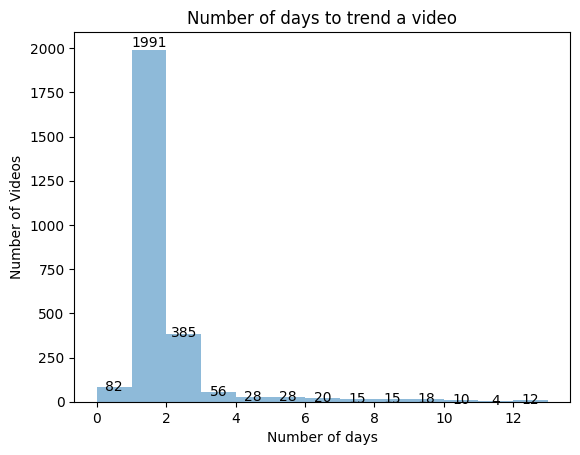

In [104]:
plot_hist(df_filtered)

In [106]:
treding_youtubers = videos_per_channel[videos_per_channel >=100].index.tolist()
df_treding_youtubers = df[df['channel_title'].isin(treding_youtubers)]

In [107]:
df_treding_youtubers.shape

(4272, 18)

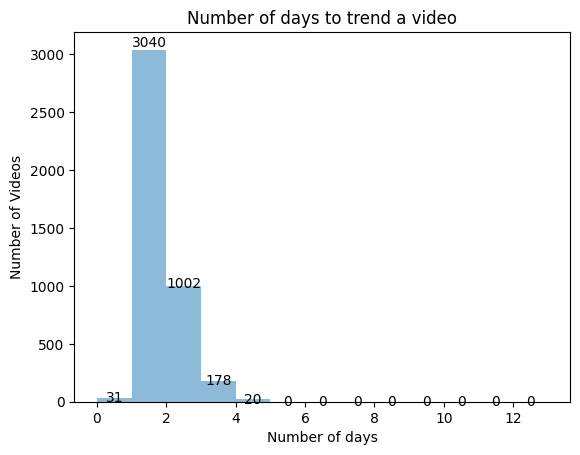

In [108]:
plot_hist(df_treding_youtubers)

#### in which month videos got most trend (trend across 2 years)

<Axes: >

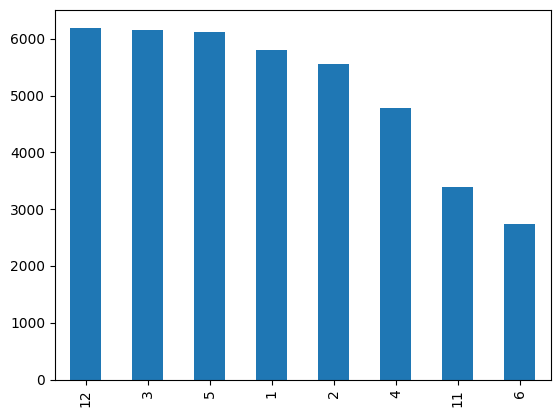

In [131]:
df['trending_month'] = df['trending_date'].dt.month
df['trending_month'].value_counts().plot(kind='bar')

#### category_id wise number of trending videos

<Axes: >

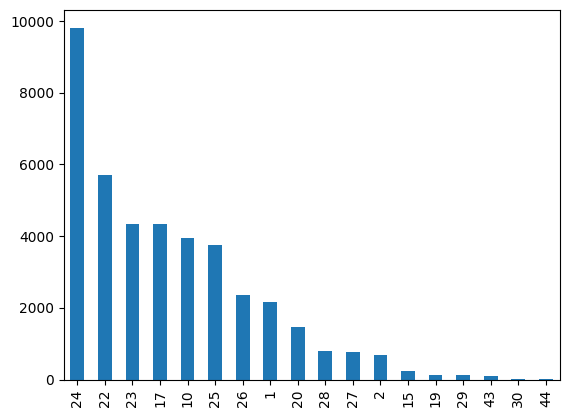

In [111]:
df['category_id'].value_counts().plot(kind='bar')

### Descriptive analysis on Views, Likes and Comments

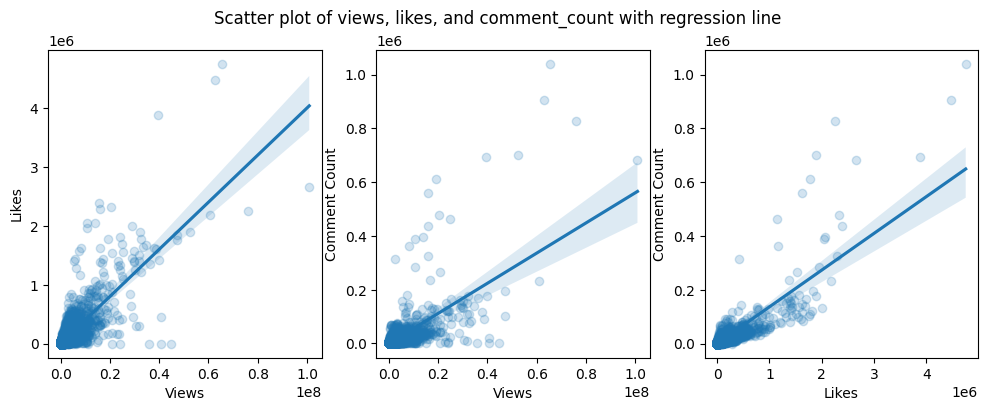

In [118]:
# Create a figure with 1 row and 3 columns
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,4))

# Plot views vs likes with regression line in the first column
sns.regplot(x='views', y='likes', data=df, ax=axes[0], scatter_kws={'alpha':0.2})
axes[0].set_xlabel('Views')
axes[0].set_ylabel('Likes')

# Plot views vs comment_count with regression line in the second column
sns.regplot(x='views', y='comment_count', data=df, ax=axes[1], scatter_kws={'alpha':0.2})
axes[1].set_xlabel('Views')
axes[1].set_ylabel('Comment Count')

# Plot likes vs comment_count with regression line in the third column
sns.regplot(x='likes', y='comment_count', data=df, ax=axes[2], scatter_kws={'alpha':0.2})
axes[2].set_xlabel('Likes')
axes[2].set_ylabel('Comment Count')

# Set the title of the figure
fig.suptitle('Scatter plot of views, likes, and comment_count with regression line')

# Show the plot
plt.show()

In [122]:
df[['views','likes','comment_count']].describe().loc[['mean','min','25%','50%','75%','max']].T

,mean,min,25%,50%,75%,max
views,419921.850604,223.0,16974.5,73721.0,270808.75,100911567.0
likes,17388.863815,0.0,338.0,1892.5,7969.50,4750254.0
comment_count,1832.452706,0.0,56.0,235.0,841.00,1040912.0


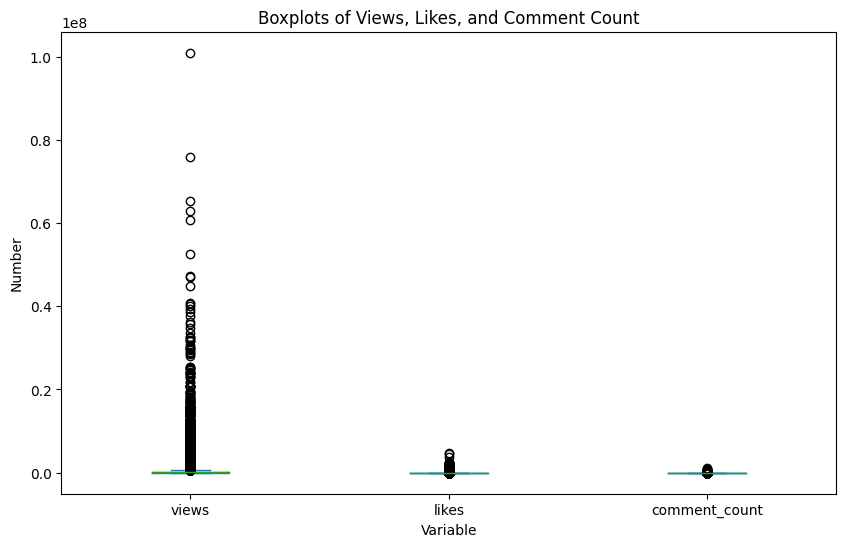

In [123]:
# Create a boxplot for views, likes, and comment_count
fig, ax = plt.subplots(figsize=(10,6))
df[['views', 'likes', 'comment_count']].plot(kind='box', ax=ax)

# Set the title and axis labels
ax.set_title('Boxplots of Views, Likes, and Comment Count')
ax.set_xlabel('Variable')
ax.set_ylabel('Number')
plt.show()

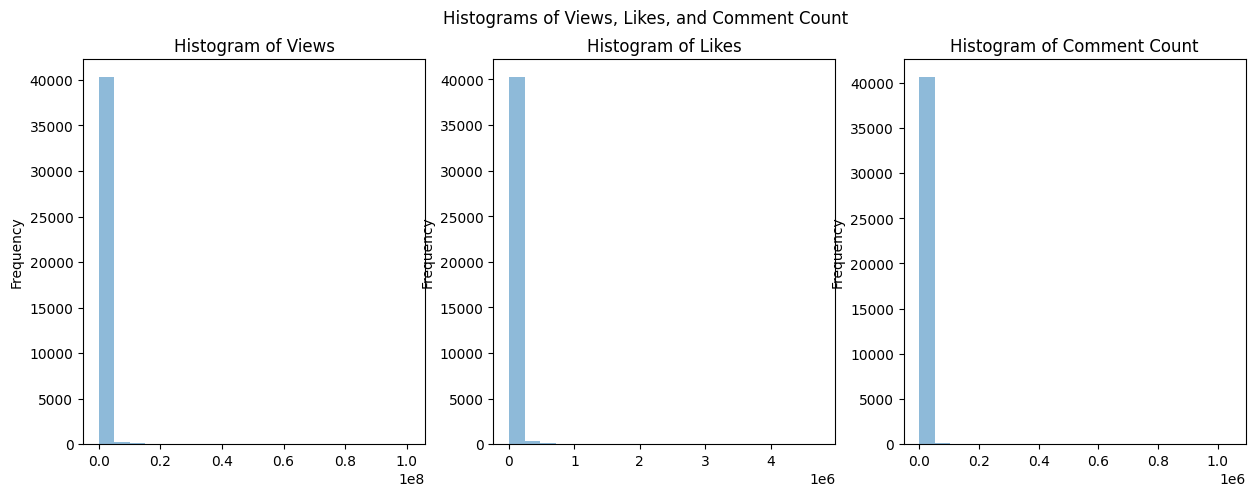

In [125]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

# Plot the histograms of views, likes, and comment_count on each subplot
df['views'].plot(kind='hist', bins=20, alpha=0.5, ax=axs[0])
axs[0].set_title('Histogram of Views')

df['likes'].plot(kind='hist', bins=20, alpha=0.5, ax=axs[1])
axs[1].set_title('Histogram of Likes')

df['comment_count'].plot(kind='hist', bins=20, alpha=0.5, ax=axs[2])
axs[2].set_title('Histogram of Comment Count')

# Set the overall title
fig.suptitle('Histograms of Views, Likes, and Comment Count')

plt.show()